<font size="6">**Machine Learning Classification Model Analysis**</font>

<font size="3">Developed by **Ivan Manurung**, a Data Strategist and Machine Learning Analyst</font>


**Case:**
<br>
Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home.
Developed for the busy professional that has little to no skills in the kitchen, they offer a wide
selection of daily-prepared gourmet meals delivered directly to your door. Each meal set takes
at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's awardwinning
disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and
easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile
app.

**Challenge:** 
<br>
In an effort to diversify their revenue stream, Apprentice Chef, Inc. has launched Halfway There,
a cross-selling promotion where subscribers receive a half bottle of wine from a local California
vineyard every Wednesday (halfway through the work week). The executives at Apprentice Chef
also believe this endeavor will create a competitive advantage based on its unique product
offering of hard to find local wines.
Halfway There has been exclusively offered to all of the customers in the dataset you received,
and the executives would like to promote this service to a wider audience. They have tasked
you with analyzing their data, developing your top insights, and building a machine

**Steps:**
1. Exploratory data analysis
2. Feature treatment and engineering
3. Utilizing appropriate modeling techniques

<font size="4">**Part I: Preparation and Exploration**</font>

In [101]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf                # statsmodel
from sklearn.model_selection import train_test_split # train, test, and split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # Optimal neighbors
from sklearn.ensemble import GradientBoostingClassifier # Gradient Bossting for classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler       # MinMax scaler
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import GridSearchCV     # Hyperparameter tuning
from sklearn.metrics import make_scorer              # model scoring
from sklearn.metrics import roc_curve                # visualize roc curve

# Pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Loading dataset
chef = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# Dropping out categorical variables that are not useful
chef = chef.drop(labels = ['NAME', 'FIRST_NAME'],
                 axis = 1)

In [102]:
# Check dataset by showing random row
chef.sample(n=5)

,REVENUE,CROSS_SELL_SUCCESS,EMAIL,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
136,1270.0,1,frenken@protonmail.com,Frenken,49,9,2,5,107.82,0,0,0,1,5,1,0,0,1,1,1,80,114.9,5,0,2,15,0
1183,2205.0,1,quill@caterpillar.com,Quill,45,1,4,3,29.00,1,2,0,1,5,0,0,3,0,0,0,10,111.2,3,0,3,13,0
592,2625.0,1,joseth@merck.com,Joseth,94,3,6,10,89.00,1,1,0,1,6,2,5,5,2,1,0,40,215.4,6,1,3,13,306
1085,1235.0,1,rylene.florent@unitedtech.com,Florent,39,8,7,7,59.20,1,1,0,1,5,1,9,0,5,0,0,10,190.2,5,0,3,12,0
1683,2835.0,0,rymolf@yahoo.com,Rymolf,120,7,7,2,80.13,0,0,0,0,6,2,9,4,1,0,0,20,173.4,4,0,3,14,0


In [103]:
# Creating a placeholder list
placeholder_lst = []

# Looping over each email address
for index, col in chef.iterrows():
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    placeholder_lst.append(split_email)
    
# Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# Renaming column to concatenate
email_df.columns = ['id' , 'email_domain']

# Concatenating personal_email_domain with Chef dataframe
chef = pd.concat([chef, email_df['email_domain']], axis = 1)


# Setting condition for professional email domain
professional_email_domains = ['@mmm.com',
                              '@amex.com',
                              '@apple.com',
                              '@boeing.com',
                              '@caterpillar.com',
                              '@chevron.com',
                              '@cisco.com',
                              '@cocacola.com',
                              '@disney.com',
                              '@dupont.com',
                              '@exxon.com',
                              '@ge.org',
                              '@goldmansacs.com',
                              '@homedepot.com',
                              '@ibm.com',
                              '@intel.com',
                              '@jnj.com',
                              '@jpmorgan.com',
                              '@mcdonalds.com',
                              '@merck.com',
                              '@microsoft.com',
                              '@nike.com',
                              '@pfizer.com',
                              '@pg.com',
                              '@travelers.com',
                              '@unitedtech.com',
                              '@unitedhealth.com',
                              '@verizon.com',
                              '@visa.com',
                              '@walmart.com']
 
# Setting condition for personal email domain    
personal_email_domains  = ['@gmail.com',
                           '@yahoo.com',
                           '@protonmail.com']

# Setting condition for junk email domain
junk_email_domains  = ['@me.com',
                       '@aol.com',
                       '@hotmail.com',
                       '@live.com',
                       '@msn.com',
                       '@passport.com']

# Creating placeholder
domain_group_lst=[]

# Looping email domain to conditions
for domain in chef['email_domain']:
    if '@' + domain in professional_email_domains:
        domain_group_lst.append('professional_email')
        
    elif '@' + domain in personal_email_domains:
        domain_group_lst.append('personal_email')
    
    elif '@' + domain in junk_email_domains:
        domain_group_lst.append('junk_email')
    
    else:
        print('Unknown')

chef['domain_group'] = pd.Series(domain_group_lst)



# One hot encoding variables email domain group
one_hot_domain_group = pd.get_dummies(chef['domain_group'])

# Joining new variables to dataframe
chef = chef.join([one_hot_domain_group])


<br>
By visualizing the weight of 3 email domain groups to show us an estimate of mean value of each attributes.We can see that professional and personal domain email group are dominating. So we can eliminate junk email as we want to avoid having Nan or infinity values by having too many dummy variables.
<br>

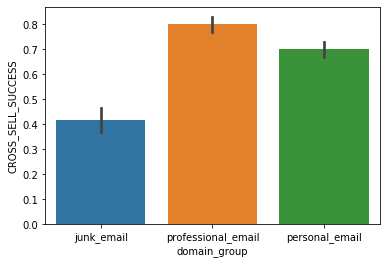

In [104]:
# Plotting email domain group
sns.barplot(x = 'domain_group', 
            y = 'CROSS_SELL_SUCCESS', 
            data = chef)

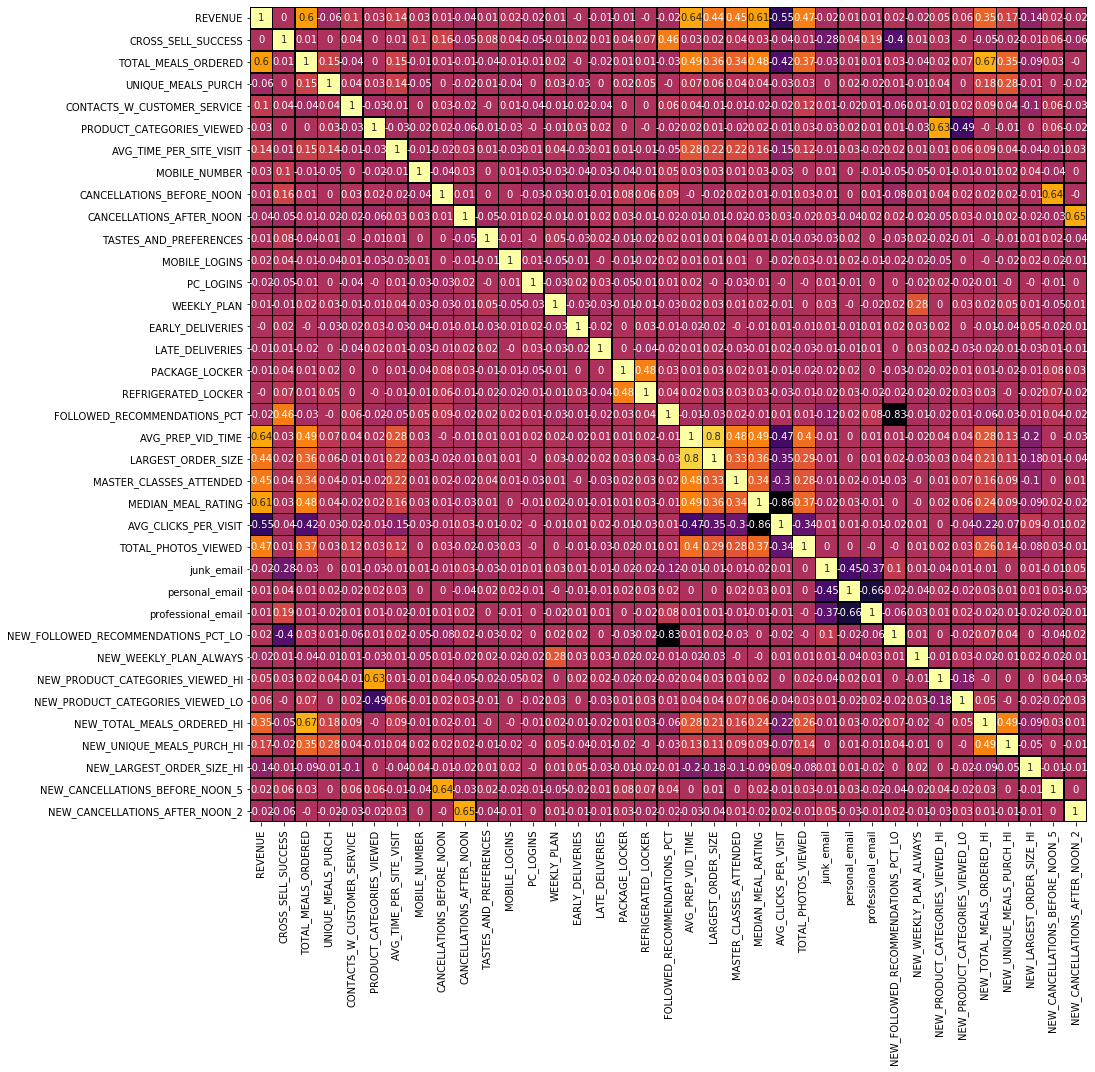

In [105]:
# Visualizing correlation using heatmap
fig, ax = plt.subplots(figsize = (15, 15))

sns.heatmap(data = chef_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# Reconfiguring the plot
bottom, top = plt.ylim() # Discovering the values for bottom and top
bottom += 0.5            # Adding 0.5 to the bottom
top -= 0.5               # Subtracting 0.5 from the top
plt.ylim(bottom, top)    # Updating the ylim(bottom, top) values

plt.show()

<br><br><font size="4">**Part II: Feature Engineering**</font>
- **Correlation matrix.** We can see that some variables are significantly correlated one to another. We are now combining two variables to create a new feature that will be useful to support our further predictive model.
- **Treshold based features.** Other technique for feature engineering is by setting a new treshold from current dataset and extract new features. To be able to do that, we need to see the shape of the data distribution. 

In [106]:
####################################################################
# Building new features based on significance level of correlation #
####################################################################

# New feature for "Median Meals Rating & Avg Clicks Per Visit" with correlation: -0.86
feature_2 = chef['MEDIAN_MEAL_RATING'] * chef['AVG_CLICKS_PER_VISIT']
feature_2_df = pd.DataFrame(feature_2)
feature_2_df.columns = ['NEW_RATING_AND_CLICKS_PER_VISIT']
chef = pd.concat([chef, feature_2_df['NEW_RATING_AND_CLICKS_PER_VISIT']], axis = 1)


# New feature for "Contacts with Customer Service per Total Meals Ordered" with correlation: -0.04
feature_3 = chef['CONTACTS_W_CUSTOMER_SERVICE'] / chef['TOTAL_MEALS_ORDERED']
feature_3_df = pd.DataFrame(feature_3)
feature_3_df.columns = ['NEW_PERCENTAGE_COMPLAINT_TO_ORDER']
chef = pd.concat([chef, feature_3_df['NEW_PERCENTAGE_COMPLAINT_TO_ORDER']], axis = 1)


# New feature for "Cross Sell Success & Followed Recommendation Picture" with correlation : 0.46
feature_4 = chef['CROSS_SELL_SUCCESS'] * chef['FOLLOWED_RECOMMENDATIONS_PCT']
feature_4_df = pd.DataFrame(feature_4)
feature_4_df.columns = ['NEW_JUNK_EMAIL_SUCCESS']
chef = pd.concat([chef, feature_4_df['NEW_JUNK_EMAIL_SUCCESS']], axis = 1)



# New feature for "Avg Photos Viewed per Total Meals Ordered" with correlation 0.37
feature_6 = chef['TOTAL_PHOTOS_VIEWED'] / chef['TOTAL_MEALS_ORDERED']
feature_6_df = pd.DataFrame(feature_6)
feature_6_df.columns = ['NEW_PHOTOS_VIEWED_PER_MEALS_ORDERED']
chef = pd.concat([chef, feature_6_df['NEW_PHOTOS_VIEWED_PER_MEALS_ORDERED']], axis = 1)


# New feature for "Revenue Per Clicks Visit" with correlation: -0.55
feature_7 = chef['REVENUE'] * chef['AVG_CLICKS_PER_VISIT']
feature_7_df = pd.DataFrame(feature_7)
feature_7_df.columns = ['NEW_REVENUE_PER_CLICKS_VISIT']
chef = pd.concat([chef, feature_7_df['NEW_REVENUE_PER_CLICKS_VISIT']], axis = 1)


# New feature for "Meals Rating & Photos Viewed" with correlation: 0.37
feature_8 = chef['MEDIAN_MEAL_RATING'] * chef['TOTAL_PHOTOS_VIEWED']
feature_8_df = pd.DataFrame(feature_8)
feature_8_df.columns = ['NEW_RATING_AND_PHOTOS_VIEWED']
chef = pd.concat([chef, feature_8_df['NEW_RATING_AND_PHOTOS_VIEWED']], axis = 1)


# New feature for "Meals Ordered & Clicks Per Visit" with correlation: -0.47
feature_9 = chef['TOTAL_MEALS_ORDERED'] * chef['AVG_CLICKS_PER_VISIT']
feature_9_df = pd.DataFrame(feature_9)
feature_9_df.columns = ['NEW_MEALS_ORDERED_CLICKS_PER_VISIT']
chef = pd.concat([chef, feature_9_df['NEW_MEALS_ORDERED_CLICKS_PER_VISIT']], axis = 1)


# New feature for "Refrigerated and Package Locker" with correlation: -0.55
feature_10 = chef['REFRIGERATED_LOCKER'] * chef['PACKAGE_LOCKER']
feature_10_df = pd.DataFrame(feature_10)
feature_10_df.columns = ['NEW_LOCKERS_BOTH']
chef = pd.concat([chef, feature_10_df['NEW_LOCKERS_BOTH']], axis = 1)


Text(0.5, 0, 'Avg Clicks Per Visit')

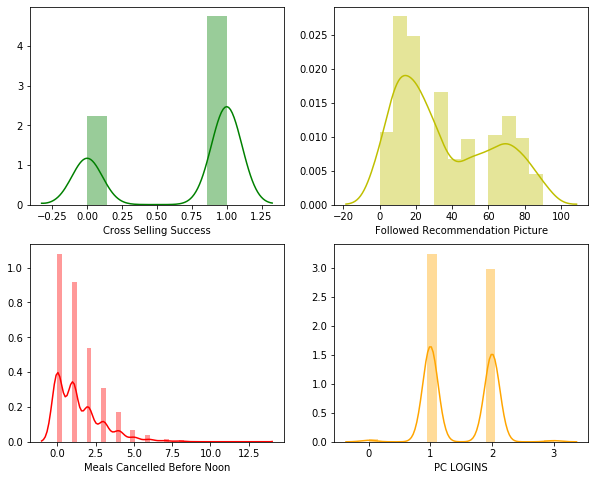

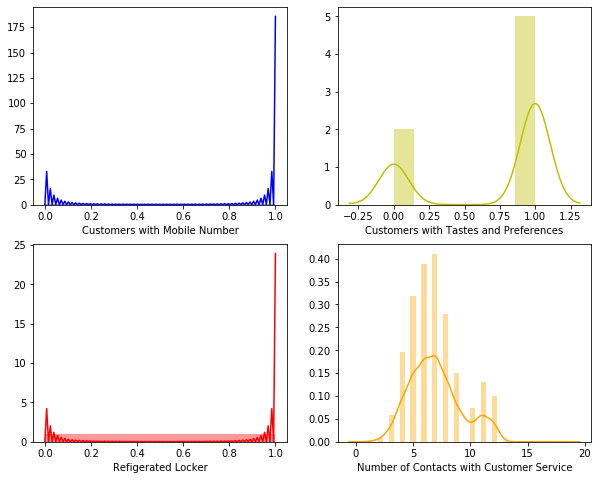

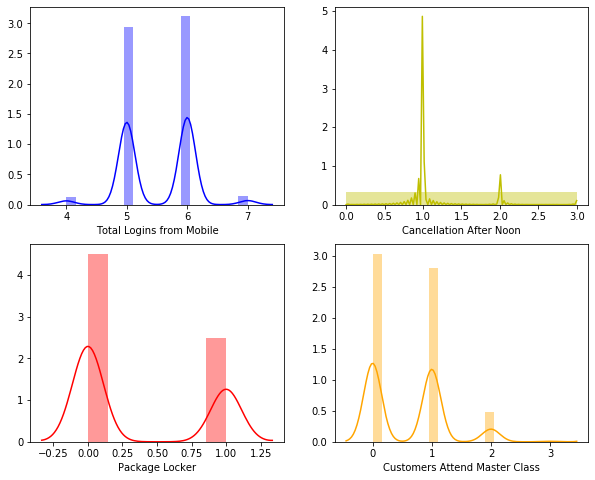

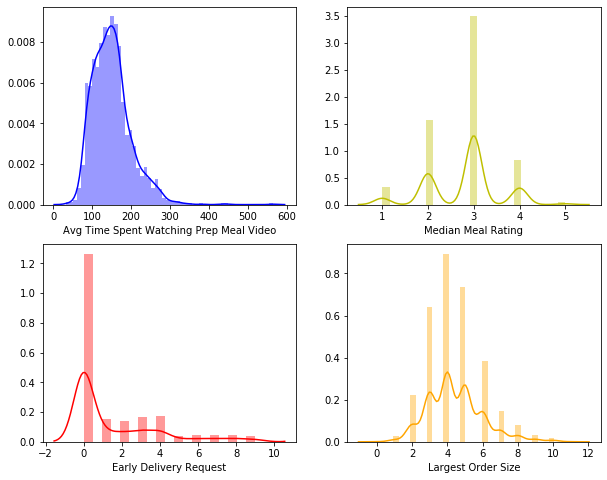

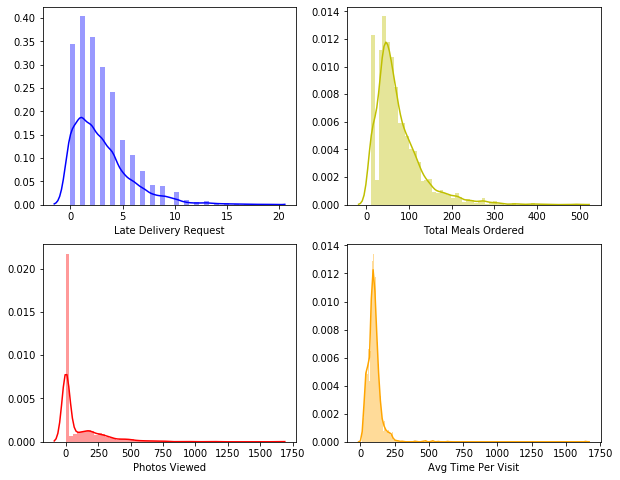

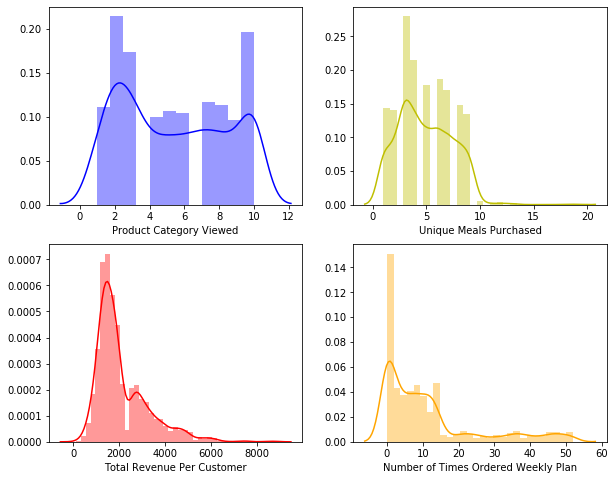

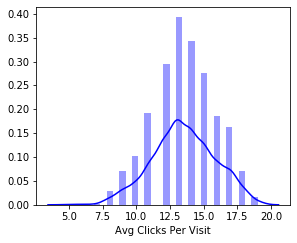

In [107]:
#########################################################################
# Feature engineering by analyzing shape of the data for each variables #
#########################################################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Cross Selling Success')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Followed Recommendation Picture')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Meals Cancelled Before Noon')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PC_LOGINS'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('PC LOGINS')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['MOBILE_NUMBER'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Customers with Mobile Number')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Customers with Tastes and Preferences')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Refigerated Locker')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Number of Contacts with Customer Service')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Total Logins from Mobile')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Cancellation After Noon')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Package Locker')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Customers Attend Master Class')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Avg Time Spent Watching Prep Meal Video')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Median Meal Rating')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Early Delivery Request')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Largest Order Size')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Late Delivery Request')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Total Meals Ordered')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Photos Viewed')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Avg Time Per Visit')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Product Category Viewed')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Unique Meals Purchased')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('Total Revenue Per Customer')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Number of Times Ordered Weekly Plan')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Avg Clicks Per Visit')


In [108]:
# Customers who follow recommendation picture
chef['NEW_FOLLOWED_RECOMMENDATIONS_PCT_LO'] = 0 # Preparing placeholder

# Replacing values based on a condition
for index, val in chef.iterrows():
    if chef.loc[index, 'FOLLOWED_RECOMMENDATIONS_PCT'] <= 20:
        chef.loc[index, 'NEW_FOLLOWED_RECOMMENDATIONS_PCT_LO'] = 1 
        

        
# Customers who always order weekly plan every week
chef['NEW_WEEKLY_PLAN_ALWAYS'] = 0
for index, val in chef.iterrows():
    if chef.loc[index, 'WEEKLY_PLAN'] == 52:
        chef.loc[index, 'NEW_WEEKLY_PLAN_ALWAYS'] = 1
        

        
# Number of times customer views meals category
chef['NEW_PRODUCT_CATEGORIES_VIEWED_HI'] = 0
chef['NEW_PRODUCT_CATEGORIES_VIEWED_LO'] = 0

# Replacing values based on 2 significant tresholds
for index, val in chef.iterrows():
    # New features for views equal to 10 times
    if chef.loc[index, 'PRODUCT_CATEGORIES_VIEWED'] == 10:
        chef.loc[index, 'NEW_PRODUCT_CATEGORIES_VIEWED_HI'] = 1
    # New features for views equal to 2 times
    elif chef.loc[index, 'PRODUCT_CATEGORIES_VIEWED'] == 2:
        chef.loc[index, 'NEW_PRODUCT_CATEGORIES_VIEWED_LO'] = 1


        
# Customers who made higher total order
chef['NEW_TOTAL_MEALS_ORDERED_HI'] = 0

# Replacing values based on unique meals purchased above 10 meals
for index, val in chef.iterrows():
    # New features for order above 200 times
    if chef.loc[index, 'TOTAL_MEALS_ORDERED'] >= 200:
        chef.loc[index, 'NEW_TOTAL_MEALS_ORDERED_HI'] = 1


        
# Customers who are likely to try more meals
chef['NEW_UNIQUE_MEALS_PURCH_HI'] = 0

# Replacing values based on unique meals purchased above 10 meals
for index, val in chef.iterrows():
    # New features for largest order made at once
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] >= 10:
        chef.loc[index, 'NEW_UNIQUE_MEALS_PURCH_HI'] = 1
    
    
    
# Customers with the largest number of meals ordered in one order
chef['NEW_LARGEST_ORDER_SIZE_HI'] = 0

# Replacing values based on a condition
for index, val in chef.iterrows():
    # New features for largest order made at once
    if chef.loc[index, 'LARGEST_ORDER_SIZE'] == 4: # Most people purchased 4 meals in one order
        chef.loc[index, 'NEW_LARGEST_ORDER_SIZE_HI'] = 1

        
# Customers who never cancelled order before noon
chef['NEW_CANCELLATIONS_BEFORE_NOON_5'] = 0

# Replacing values based on a condition
for index, val in chef.iterrows():
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] >= 5:
        chef.loc[index, 'NEW_CANCELLATIONS_BEFORE_NOON_5'] = 1
        

# Customers who never cancelled order after noon
chef['NEW_CANCELLATIONS_AFTER_NOON_2'] = 0

# Replacing values based on a condition
for index, val in chef.iterrows():
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] >= 2:
        chef.loc[index, 'NEW_CANCELLATIONS_AFTER_NOON_2'] = 1

Saving all new features into new dataset before moving forward to next step

In [109]:
# Saving results with all new features
chef.to_excel('Apprentice_Chef_Dataset_features_rich.xlsx', 
              index = False)

<br><font size="4">**Part III: Utilizing appropriate modeling techniques**</font>
- Declaring explanatory variables as **chef_full** and **chef_target** as target variable
- Building OLS model to select significant features based on p-value
- Preparing **training and testing** sets with stratification as this is classification model

In [110]:
# Loading previously stored dataset
chef = pd.read_excel('Apprentice_Chef_Dataset_features_rich.xlsx')


# Assigning explanatory variable by dropping target and categorical variables
chef_full = chef.drop(labels = 'CROSS_SELL_SUCCESS', axis = 1)


# Assigning target variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [112]:
# Looping explanatory variables before building logistic regression
for val in chef_full:
    print(f"{val} +")

REVENUE +
EMAIL +
FAMILY_NAME +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
MOBILE_LOGINS +
PC_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
email_domain +
domain_group +
junk_email +
personal_email +
professional_email +
NEW_RATING_AND_CLICKS_PER_VISIT +
NEW_PERCENTAGE_COMPLAINT_TO_ORDER +
NEW_JUNK_EMAIL_SUCCESS +
NEW_PHOTOS_VIEWED_PER_MEALS_ORDERED +
NEW_REVENUE_PER_CLICKS_VISIT +
NEW_RATING_AND_PHOTOS_VIEWED +
NEW_MEALS_ORDERED_CLICKS_PER_VISIT +
NEW_LOCKERS_BOTH +
NEW_FOLLOWED_RECOMMENDATIONS_PCT_LO +
NEW_WEEKLY_PLAN_ALWAYS +
NEW_PRODUCT_CATEGORIES_VIEWED_HI +
NEW_PRODUCT_CATEGORIES_VIEWED_LO 

**i. OLS Model using with full features**

In [113]:
# Computing full model with all explanatory variables
log_full = smf.logit(formula   = """CROSS_SELL_SUCCESS ~ 
                                    REVENUE +
                                    TOTAL_MEALS_ORDERED +
                                    UNIQUE_MEALS_PURCH +
                                    CONTACTS_W_CUSTOMER_SERVICE +
                                    PRODUCT_CATEGORIES_VIEWED +
                                    AVG_TIME_PER_SITE_VISIT +
                                    MOBILE_NUMBER +
                                    CANCELLATIONS_BEFORE_NOON +
                                    CANCELLATIONS_AFTER_NOON +
                                    TASTES_AND_PREFERENCES +
                                    MOBILE_LOGINS +
                                    PC_LOGINS +
                                    WEEKLY_PLAN +
                                    EARLY_DELIVERIES +
                                    LATE_DELIVERIES +
                                    PACKAGE_LOCKER +
                                    REFRIGERATED_LOCKER +
                                    FOLLOWED_RECOMMENDATIONS_PCT +
                                    AVG_PREP_VID_TIME +
                                    LARGEST_ORDER_SIZE +
                                    MASTER_CLASSES_ATTENDED +
                                    MEDIAN_MEAL_RATING +
                                    AVG_CLICKS_PER_VISIT +
                                    TOTAL_PHOTOS_VIEWED +
                                    NEW_RATING_AND_CLICKS_PER_VISIT +
                                    NEW_PERCENTAGE_COMPLAINT_TO_ORDER +
                                    NEW_JUNK_EMAIL_SUCCESS +
                                    NEW_PHOTOS_VIEWED_PER_MEALS_ORDERED +
                                    NEW_REVENUE_PER_CLICKS_VISIT +
                                    NEW_RATING_AND_PHOTOS_VIEWED +
                                    NEW_MEALS_ORDERED_CLICKS_PER_VISIT +
                                    NEW_LOCKERS_BOTH +
                                    NEW_FOLLOWED_RECOMMENDATIONS_PCT_LO +
                                    NEW_WEEKLY_PLAN_ALWAYS +
                                    NEW_PRODUCT_CATEGORIES_VIEWED_HI +
                                    NEW_PRODUCT_CATEGORIES_VIEWED_LO +
                                    NEW_TOTAL_MEALS_ORDERED_HI +
                                    NEW_UNIQUE_MEALS_PURCH_HI +
                                    NEW_LARGEST_ORDER_SIZE_HI +
                                    NEW_CANCELLATIONS_BEFORE_NOON_5 +
                                    NEW_CANCELLATIONS_AFTER_NOON_2""",
                                    data = chef_train)

# Fitting the model object
results_full = log_full.fit()

# Checking the results SUMMARY
results_full.summary()

         Current function value: 0.023493
         Iterations: 35


/Users/ivanmanurung/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ivanmanurung/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/ivanmanurung/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/ivanmanurung/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/ivanmanurung/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1418
Method:                           MLE   Df Model:                           40
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:                  0.9626
Time:                        01:15:21   Log-Likelihood:                -34.276
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -128.2420        nan        nan        nan         nan         nan
REVENUE                                 0.0017      0.006      0.263      0.793      -0.011       0.014
TOTAL_MEALS_ORDERED                    -0.3296        nan        nan        nan         nan         nan
UNIQUE_MEALS_PURCH                     -0.1263      0.167     -0.757      0.449      -0.453       0.201
CONTACTS_W_CUSTOMER_SERVICE             0.4745      0.335      1.418      0.156      -0.181       1.130
PRODUCT_CATEGORIES_VIEWED               0.3292      0.232      1.422      0.155      -0.125       0.783
AVG_TIME_PER_SITE_VISIT                 0.0467      0.013      3.654      0.000       0.022       0.072
MOBILE_NUMBER                           4.1590      0.671      6.199      0.000       2.844       5.474
CANCELLATIONS_BEFORE_NOON               0.4131      0.332      1.246      0.213      -0.237       1.063
CANCELLATIONS_AFTER_NOON               -1.4894      1.580     -0.943      0.346      -4.586       1.607
TASTES_AND_PREFERENCES                 -0.4788      0.768     -0.623      0.533      -1.985       1.027
MOBILE_LOGINS                           0.3701      0.625      0.592      0.554      -0.856       1.596
PC_LOGINS                              -3.8294        nan        nan        nan         nan         nan
WEEKLY_PLAN                             0.1075      0.018      5.845      0.000       0.071       0.144
EARLY_DELIVERIES                       -0.1256      0.161     -0.782      0.434      -0.440       0.189
LATE_DELIVERIES                        -0.2289        nan        nan        nan         nan         nan
PACKAGE_LOCKER                         -0.2441      0.919     -0.266      0.791      -2.045       1.557
REFRIGERATED_LOCKER                    -2.5408   7.48e+14  -3.39e-15      1.000   -1.47e+15    1.47e+15
FOLLOWED_RECOMMENDATIONS_PCT           -4.5704    351.727     -0.013      0.990    -693.943     684.802
AVG_PREP_VID_TIME                       0.0003      0.024      0.012      0.990      -0.046       0.047
LARGEST_ORDER_SIZE                     -0.4688      0.566     -0.828      0.408      -1.578       0.641
MASTER_CLASSES_ATTENDED                 1.6207      0.709      2.287      0.022       0.232       3.010
MEDIAN_MEAL_RATING                      6.7498      2.131      3.167      0.002       2.573      10.927
AVG_CLICKS_PER_VISIT                   -0.3955      0.834     -0.474      0.635      -2.030       1.239
TOTAL_PHOTOS_VIEWED                     0.0388        nan        nan        nan         nan         nan
NEW_RATING_AND_CLICKS_PER_VISIT        -0.7299        nan        nan        nan         nan         nan
NEW_PERCENTAGE_COMPLAINT_TO_ORDER      -0.6273      5.435     -0.115      0.908     -11.280      10.026
NEW_JUNK_EMAIL_SUCCESS                 14.6300        nan        nan        nan         nan         nan
NEW_PHOTOS_VIEWED

**ii. OLS Model after removing insignificant variables based on p-value and coefficient**

In [114]:
# Computing final model with selected variables
log_final = smf.logit(formula  = """CROSS_SELL_SUCCESS ~ 
                                    REVENUE +
                                    PRODUCT_CATEGORIES_VIEWED +
                                    AVG_TIME_PER_SITE_VISIT +
                                    MOBILE_NUMBER +
                                    CANCELLATIONS_BEFORE_NOON +
                                    TASTES_AND_PREFERENCES +
                                    PC_LOGINS +
                                    EARLY_DELIVERIES +
                                    LATE_DELIVERIES +
                                    REFRIGERATED_LOCKER +
                                    FOLLOWED_RECOMMENDATIONS_PCT +
                                    MASTER_CLASSES_ATTENDED +
                                    MEDIAN_MEAL_RATING +
                                    TOTAL_PHOTOS_VIEWED +
                                    NEW_RATING_AND_CLICKS_PER_VISIT +
                                    NEW_PHOTOS_VIEWED_PER_MEALS_ORDERED +
                                    NEW_MEALS_ORDERED_CLICKS_PER_VISIT +
                                    NEW_FOLLOWED_RECOMMENDATIONS_PCT_LO +
                                    NEW_WEEKLY_PLAN_ALWAYS +
                                    NEW_PRODUCT_CATEGORIES_VIEWED_HI +
                                    NEW_PRODUCT_CATEGORIES_VIEWED_LO +
                                    NEW_TOTAL_MEALS_ORDERED_HI +
                                    NEW_CANCELLATIONS_AFTER_NOON_2""",
                                    data = chef_train)

# Fitting the model object
results_final = log_final.fit()

# Checking the results SUMMARY
results_final.summary()

Optimization terminated successfully.
         Current function value: 0.458843
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1435
Method:                           MLE   Df Model:                           23
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:                  0.2693
Time:                        01:15:21   Log-Likelihood:                -669.45
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 8.001e-90
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.7169      0.615     -4.414      0.000      -3.923      -1.511
REVENUE                             -8.885e-05   9.42e-05     -0.943      0.346      -0.000    9.58e-05
PRODUCT_CATEGORIES_VIEWED              -0.0467      0.032     -1.455      0.146      -0.110       0.016
AVG_TIME_PER_SITE_VISIT                 0.0016      0.001      1.470      0.142      -0.001       0.004
MOBILE_NUMBER                           0.7334      0.199      3.691      0.000       0.344       1.123
CANCELLATIONS_BEFORE_NOON               0.2496      0.049      5.127      0.000       0.154       0.345
TASTES_AND_PREFERENCES                  0.3623      0.147      2.470      0.014       0.075       0.650
PC_LOGINS                              -0.3511      0.126     -2.780      0.005      -0.599      -0.104
EARLY_DELIVERIES                        0.0320      0.030      1.057      0.291      -0.027       0.091
LATE_DELIVERIES                         0.0317      0.025      1.284      0.199      -0.017       0.080
REFRIGERATED_LOCKER                     0.3964      0.226      1.753      0.080      -0.047       0.839
FOLLOWED_RECOMMENDATIONS_PCT            0.0779      0.007     11.356      0.000       0.064       0.091
MASTER_CLASSES_ATTENDED                 0.1515      0.120      1.258      0.208      -0.085       0.388
MEDIAN_MEAL_RATING                      0.4681      0.170      2.759      0.006       0.136       0.801
TOTAL_PHOTOS_VIEWED                    -0.0009      0.001     -1.314      0.189      -0.002       0.000
NEW_RATING_AND_CLICKS_PER_VISIT        -0.0438      0.017     -2.575      0.010      -0.077      -0.010
NEW_PHOTOS_VIEWED_PER_MEALS_ORDERED     0.0580      0.032      1.799      0.072      -0.005       0.121
NEW_MEALS_ORDERED_CLICKS_PER_VISIT      0.0004      0.000      2.777      0.005       0.000       0.001
NEW_FOLLOWED_RECOMMENDATIONS_PCT_LO     0.9122      0.238      3.840      0.000       0.447       1.378
NEW_WEEKLY_PLAN_ALWAYS                  0.6765      0.850      0.796      0.426      -0.989       2.343
NEW_PRODUCT_CATEGORIES_VIEWED_HI        0.4880      0.248      1.968      0.049       0.002       0.974
NEW_PRODUCT_CATEGORIES_VIEWED_LO       -0.2609      0.219     -1.191      0.234      -0.690       0.169
NEW_TOTAL_MEALS_ORDERED_HI             -0.9946      0.426     -2.334      0.020      -1.830      -0.159
NEW_CANCELLATIONS_AFTER_NOON_2         -0.8193      0.453     -1.808      0.071      -1.708       0.069
=======================================================================================================
"""

**iii. Stored all selected features in a single object**

In [115]:
# Saving final candidate model into explanatory variables
x_variables_final = ['REVENUE' ,
'PRODUCT_CATEGORIES_VIEWED' ,
'AVG_TIME_PER_SITE_VISIT' ,
'MOBILE_NUMBER' ,
'CANCELLATIONS_BEFORE_NOON' ,
'TASTES_AND_PREFERENCES' ,
'PC_LOGINS' ,
'EARLY_DELIVERIES' ,
'LATE_DELIVERIES' ,
'REFRIGERATED_LOCKER' ,
'FOLLOWED_RECOMMENDATIONS_PCT' ,
'MASTER_CLASSES_ATTENDED' ,
'MEDIAN_MEAL_RATING' ,
'TOTAL_PHOTOS_VIEWED' ,
'NEW_RATING_AND_CLICKS_PER_VISIT' ,
'NEW_PHOTOS_VIEWED_PER_MEALS_ORDERED' ,
'NEW_MEALS_ORDERED_CLICKS_PER_VISIT' ,
'NEW_FOLLOWED_RECOMMENDATIONS_PCT_LO' ,
'NEW_WEEKLY_PLAN_ALWAYS' ,
'NEW_PRODUCT_CATEGORIES_VIEWED_HI' ,
'NEW_PRODUCT_CATEGORIES_VIEWED_LO' ,
'NEW_TOTAL_MEALS_ORDERED_HI' ,
'NEW_CANCELLATIONS_AFTER_NOON_2']

# Storing X from final selected features
chef_features = chef.loc[ : , x_variables_final]

<br><br><font size="4">**Part IV: Classification model with KNN Classifier**</font> 

- Determin n_neighbor using user defined function  **optimal_neighbors**
- Compute **accuracy score**  and **Area under ROC curve** for normal and scaled dataset
- Describe the performance of the classification model with **confusion matrix**
- Calculate **classification report** contains of precision, recall, and F1 score for each class

In [130]:
# optimal_neighbors
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

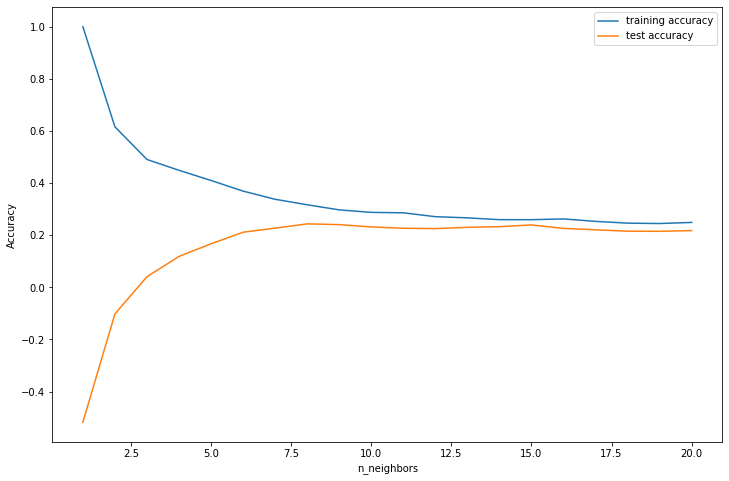

The optimal number of neighbors is: 8


In [131]:
# Determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

We can observe above that we get maximum testing accuracy for **n_neighbor = 8**. So lets create a KNeighborsClassifier with number of neighbors as 8.

In [132]:
# Setup a knn classifier with optimum k neighbors
knn = KNeighborsClassifier(n_neighbors = opt_neighbors)

# Fit the model
knn_fit = knn.fit(X_train, y_train)

# Predict the model
knn_pred = knn_fit.predict(X_test)

# Get accuracy
knn.score(X_test, y_test).round(3)

# ROC curve and Area-Under-Curve (AUC) for KNN Classifier Model
roc_auc_knn = roc_auc_score(y_true = y_test,
                            y_score = knn_pred)


# Print the result
print('Accuracy score KNN (training):', knn_fit.score(X_train, y_train).round(3))
print('Accuracy score KNN (testing):', knn_fit.score(X_test, y_test).round(3))
print("Area under ROC curve KNN = {:0.2f}".format(roc_auc_knn))

Accuracy score KNN (training): 0.749
Accuracy score KNN (testing): 0.622
Area under ROC curve KNN = 0.53


In [134]:
# Setup a StandardScaler model
scaler = StandardScaler()

# Fit the model
scaler.fit(chef_features)

# Transform the model
X_scaled = scaler.transform(chef_features)

# Save in dataframe
X_scaled_df = pd.DataFrame(X_scaled)

# Train, test, split the scaled model
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_df,
                                                                                chef_target,
                                                                                random_state = 222,
                                                                                test_size = 0.25,
                                                                                stratify = chef_target)


# Setup a knn classifier with optimum k neighbors
knn_optimal = KNeighborsClassifier(n_neighbors = opt_neighbors)

# Fit the model
knn_fit_scaled = knn_optimal.fit(X_train_scaled, y_train_scaled)

# Predict the model
knn_pred_scaled = knn_fit.predict(X_test_scaled)

# ROC curve and Area-Under-Curve (AUC) for KNN Classifier Model
roc_auc_knn_scaled = roc_auc_score(y_true = y_test_scaled,
                                   y_score = knn_pred_scaled)


# Print the result
print('Scaled Accuracy score KNN (training):', knn_fit_scaled.score(X_train_scaled, y_train_scaled).round(3))
print('Scaled Accuracy score KNN (testing):', knn_fit_scaled.score(X_test_scaled, y_test_scaled).round(3))
print("Scaled Area under ROC curve KNN = {:0.2f}".format(roc_auc_knn_scaled))

Scaled Accuracy score KNN (training): 0.79
Scaled Accuracy score KNN (testing): 0.702
Scaled Area under ROC curve KNN = 0.50


In [135]:
# In case of classifier like KNN the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

# Set KNeighborsClassifier
knn_tuned = KNeighborsClassifier()

# GridSearchCV object
knn_tuned_cv = GridSearchCV(knn, 
                            param_grid, 
                            cv = 5)


# Fit to the scaled dataset
knn_tuned_cv.fit(X_train_scaled, y_train_scaled)

# INSTANTIATING a KNN tuned model with tuned values
knn_tuned_est = knn_tuned_cv.best_estimator_


# PREDICTING based on the testing set
knn_tuned_pred = knn_tuned_est.predict(X_test_scaled)


print("Tuned Parameters KNN :", knn_tuned_cv.best_params_)
print("Tuned Accuracy score KNN (training):", knn_tuned_est.score(X_train_scaled, y_train_scaled).round(3))
print("Tuned Accuracy score KNN (testing):", knn_tuned_est.score(X_test_scaled, y_test_scaled).round(3))
print("Tuned Training AUC KNN:", knn_tuned_cv.best_score_.round(3))


Tuned Parameters KNN : {'n_neighbors': 30}
Tuned Accuracy score KNN (training): 0.734
Tuned Accuracy score KNN (testing): 0.7
Tuned Training AUC KNN: 0.727


In [136]:
# Get confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_scaled, 
                       knn_tuned_pred))

# Get classification report
print(classification_report(y_test_scaled, 
                            knn_tuned_pred))

Confusion Matrix:
[[ 64  92]
 [ 54 277]]
              precision    recall  f1-score   support

           0       0.54      0.41      0.47       156
           1       0.75      0.84      0.79       331

    accuracy                           0.70       487
   macro avg       0.65      0.62      0.63       487
weighted avg       0.68      0.70      0.69       487



In [137]:
# Print the summary score results of all Gradient Boosting Classifier Model

# Baseline model KNN Classifier
print(f"""Baseline model KNN Classifier (full features):
--------------------------------------------""")
print('Accuracy score KNN (training):', knn_fit.score(X_train, y_train).round(3))
print('Accuracy score KNN (testing):', knn_fit.score(X_test, y_test).round(3))
print("Area under ROC curve KNN = {:0.2f}".format(roc_auc_knn))
print()

# Scaled model KNN Classifier
print(f"""Scaled model KNN Classifier (full features):
-------------------------------------------""")
print('Scaled Accuracy score KNN (training):', knn_fit_scaled.score(X_train_scaled, y_train_scaled).round(3))
print('Scaled Accuracy score KNN (testing):', knn_fit_scaled.score(X_test_scaled, y_test_scaled).round(3))
print("Scaled Area under ROC curve KNN = {:0.2f}".format(roc_auc_knn_scaled))
print()


# Tuned KNN Classifier result
print(f"""Tuned Parameter Gradient Boosting Classifier (full features):
------------------------------------------------------------""")
print("Tuned Parameters KNN :", knn_tuned_cv.best_params_)
print("Tuned Accuracy score KNN (training):", knn_tuned_est.score(X_train_scaled, y_train_scaled).round(3))
print("Tuned Accuracy score KNN (testing):", knn_tuned_est.score(X_test_scaled, y_test_scaled).round(3))
print("Tuned Training AUC KNN:", knn_tuned_cv.best_score_.round(3))
print()


Baseline model KNN Classifier (full features):
--------------------------------------------
Accuracy score KNN (training): 0.749
Accuracy score KNN (testing): 0.622
Area under ROC curve KNN = 0.53

Scaled model KNN Classifier (full features):
-------------------------------------------
Scaled Accuracy score KNN (training): 0.79
Scaled Accuracy score KNN (testing): 0.702
Scaled Area under ROC curve KNN = 0.50

Tuned Parameter Gradient Boosting Classifier (full features):
------------------------------------------------------------
Tuned Parameters KNN : {'n_neighbors': 30}
Tuned Accuracy score KNN (training): 0.734
Tuned Accuracy score KNN (testing): 0.7
Tuned Training AUC KNN: 0.727



<font size="2">**Summary KNN Classifier Model**</font>
- For the **Tuned KNN Classifier model** with number of **neighbors as 42** achieves THE BEST training and testing score/accuracy of **0.757 and 0.754**.
- Tuned KNN Classifier model l on training subset results in **average precision, recall, and f1-scores** on test subset were **0.74, 0.75, and 0.74** respectively, with **area under ROC (AUC) was 0.759**

<br><font size="5">**Business Insights:**</font><br>
After analyzing the data, we can understand that most of the customers are being influenced to purchase meals after seeing the recommendation pictures. On average, 35% of orders are being made driven by the meal recommendation. However, we need increase the rate because based on the collinearity matrix, customer who are not likely to order based on the recommendation meal, they won’t subscribe to Halfway-There service. We could therefore conclude that the meals that are being recommended to them are not match with their meal preference.
Secondly, it is quite surprising for customers who made more order on the Apprentice Chef platform, they are not necessarily willing to subscribe to Halfway-There service. Although this is important to increase revenue, we have to be aware that new customers might be more interested to subscribe than people who have been using the platform longer.


<br><font size="5">**Recommendation:**</font><br>
Meal recommendation is an important feature for Apprentice Chef customers. Based on those findings, there is one key action that might be helpful to drive customers to subscribe while at the same time can drive revenue higher as well. Since we have professional email, family name, and historical meal purchase data, we can group the customers based on those characteristic and create meal recommendation for couples, family, or coworker. By having this, we can increase the size of order which directly lead to revenue increased. Once we get more customers purchase using the meal recommendation, we are confident that more customers will subscribe to Halfway-There.
AUC Score: 0.97